In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

data_origin = pd.read_excel("peace agreement.xlsx")
data_origin.head()

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,1
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,1,1
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,2,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,...,0,0,0,0,1,1,0,0,0,1
3,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,1,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,...,0,0,0,1,0,0,0,0,1,1
4,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,1,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,1


In [5]:
data = data_origin.loc[ data_origin['NatRes'] == 1 ]
print(data.shape[0])

217


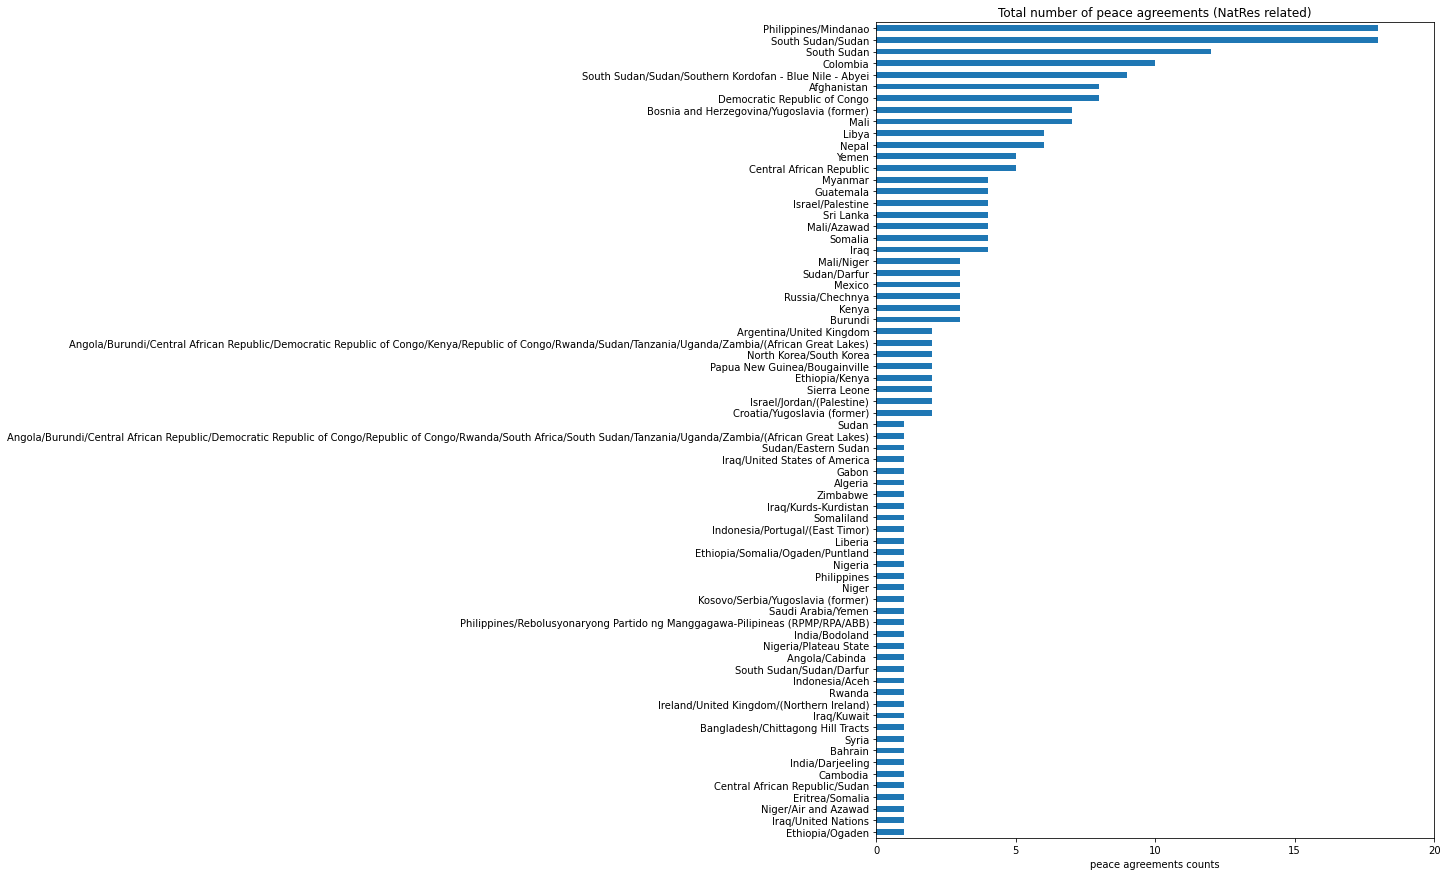

In [6]:
data_country = data.loc[:,'Con'].value_counts().sort_values(ascending = True)

plt.figure(figsize=(10,15))
data_country.plot(kind='barh')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5)) # 设置整数
plt.xlim(0,20)
plt.title('Total number of peace agreements (NatRes related)')
plt.xlabel('peace agreements counts')
plt.show()

In [7]:
print(data_country.shape[0])

70


In [10]:
data_Africa = data.loc[ data['Reg'] == 'Africa (excl MENA)']
data_Africa_country = data_Africa.loc[:,'Con'].value_counts().sort_values(ascending=True)
print(data_Africa_country.shape[0])

33


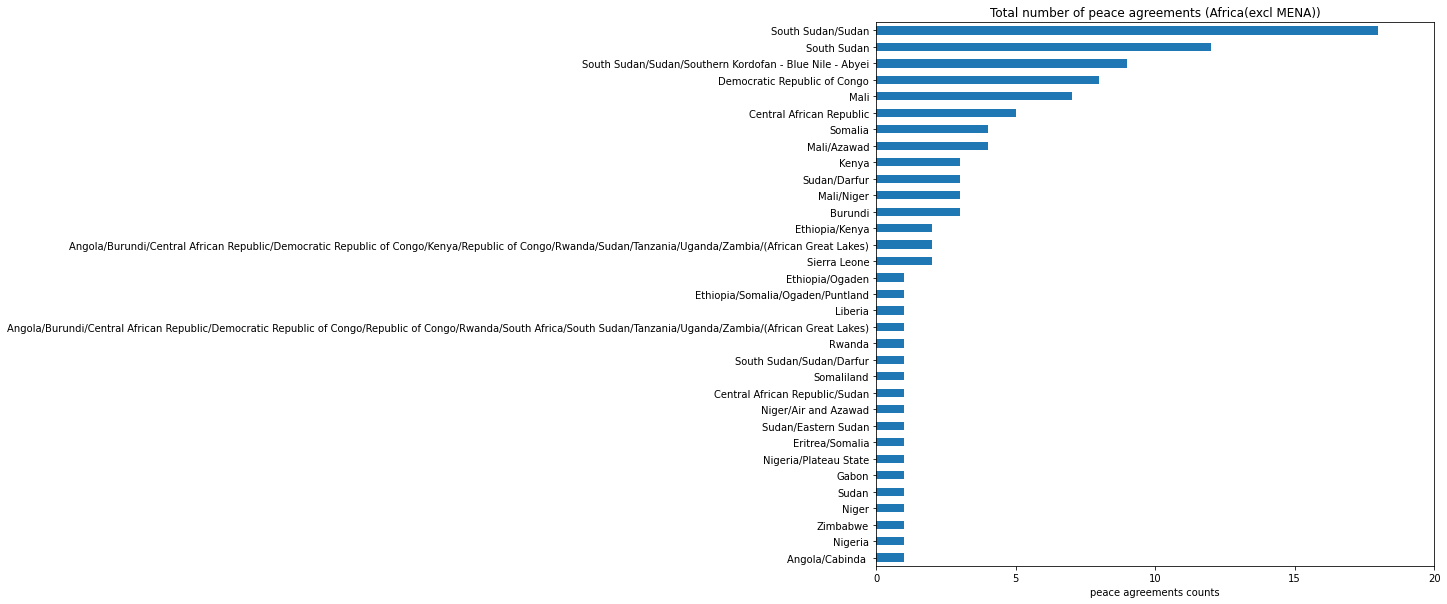

In [11]:
plt.figure(figsize=(10,10))
data_Africa_country.plot(kind='barh')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5)) # 设置整数
plt.xlim(0,20)
plt.title('Total number of peace agreements (Africa(excl MENA))')
plt.xlabel('peace agreements counts')
plt.show()

In [12]:
import copy
data_origin_Africa_country = copy.deepcopy(data_Africa_country)
for index in range(data_Africa_country.shape[0]):
    data_origin_Africa_country[index] = 0

print(data_origin_Africa_country)

Angola/Cabinda                                                                                                                                                         0
Nigeria                                                                                                                                                                0
Zimbabwe                                                                                                                                                               0
Niger                                                                                                                                                                  0
Sudan                                                                                                                                                                  0
Gabon                                                                                                                                                      

In [13]:
for index, row in data_origin.iterrows():
    if data_origin.loc[index, 'Con'] in data_Africa_country.index:
        data_origin_Africa_country[data_origin.loc[index, 'Con']] = data_origin_Africa_country[data_origin.loc[index, 'Con']] + 1

print(data_origin_Africa_country)

Angola/Cabinda                                                                                                                                                          1
Nigeria                                                                                                                                                                 6
Zimbabwe                                                                                                                                                                3
Niger                                                                                                                                                                   2
Sudan                                                                                                                                                                   6
Gabon                                                                                                                                                 

In [14]:
data_Africa_country = data_Africa_country.sort_index()
print(data_Africa_country)

Angola/Burundi/Central African Republic/Democratic Republic of Congo/Kenya/Republic of Congo/Rwanda/Sudan/Tanzania/Uganda/Zambia/(African Great Lakes)                  2
Angola/Burundi/Central African Republic/Democratic Republic of Congo/Republic of Congo/Rwanda/South Africa/South Sudan/Tanzania/Uganda/Zambia/(African Great Lakes)     1
Angola/Cabinda                                                                                                                                                          1
Burundi                                                                                                                                                                 3
Central African Republic                                                                                                                                                5
Central African Republic/Sudan                                                                                                                        

In [15]:
data_origin_Africa_country = data_origin_Africa_country.sort_index()
print(data_origin_Africa_country)

Angola/Burundi/Central African Republic/Democratic Republic of Congo/Kenya/Republic of Congo/Rwanda/Sudan/Tanzania/Uganda/Zambia/(African Great Lakes)                  2
Angola/Burundi/Central African Republic/Democratic Republic of Congo/Republic of Congo/Rwanda/South Africa/South Sudan/Tanzania/Uganda/Zambia/(African Great Lakes)     1
Angola/Cabinda                                                                                                                                                          1
Burundi                                                                                                                                                                26
Central African Republic                                                                                                                                               43
Central African Republic/Sudan                                                                                                                        

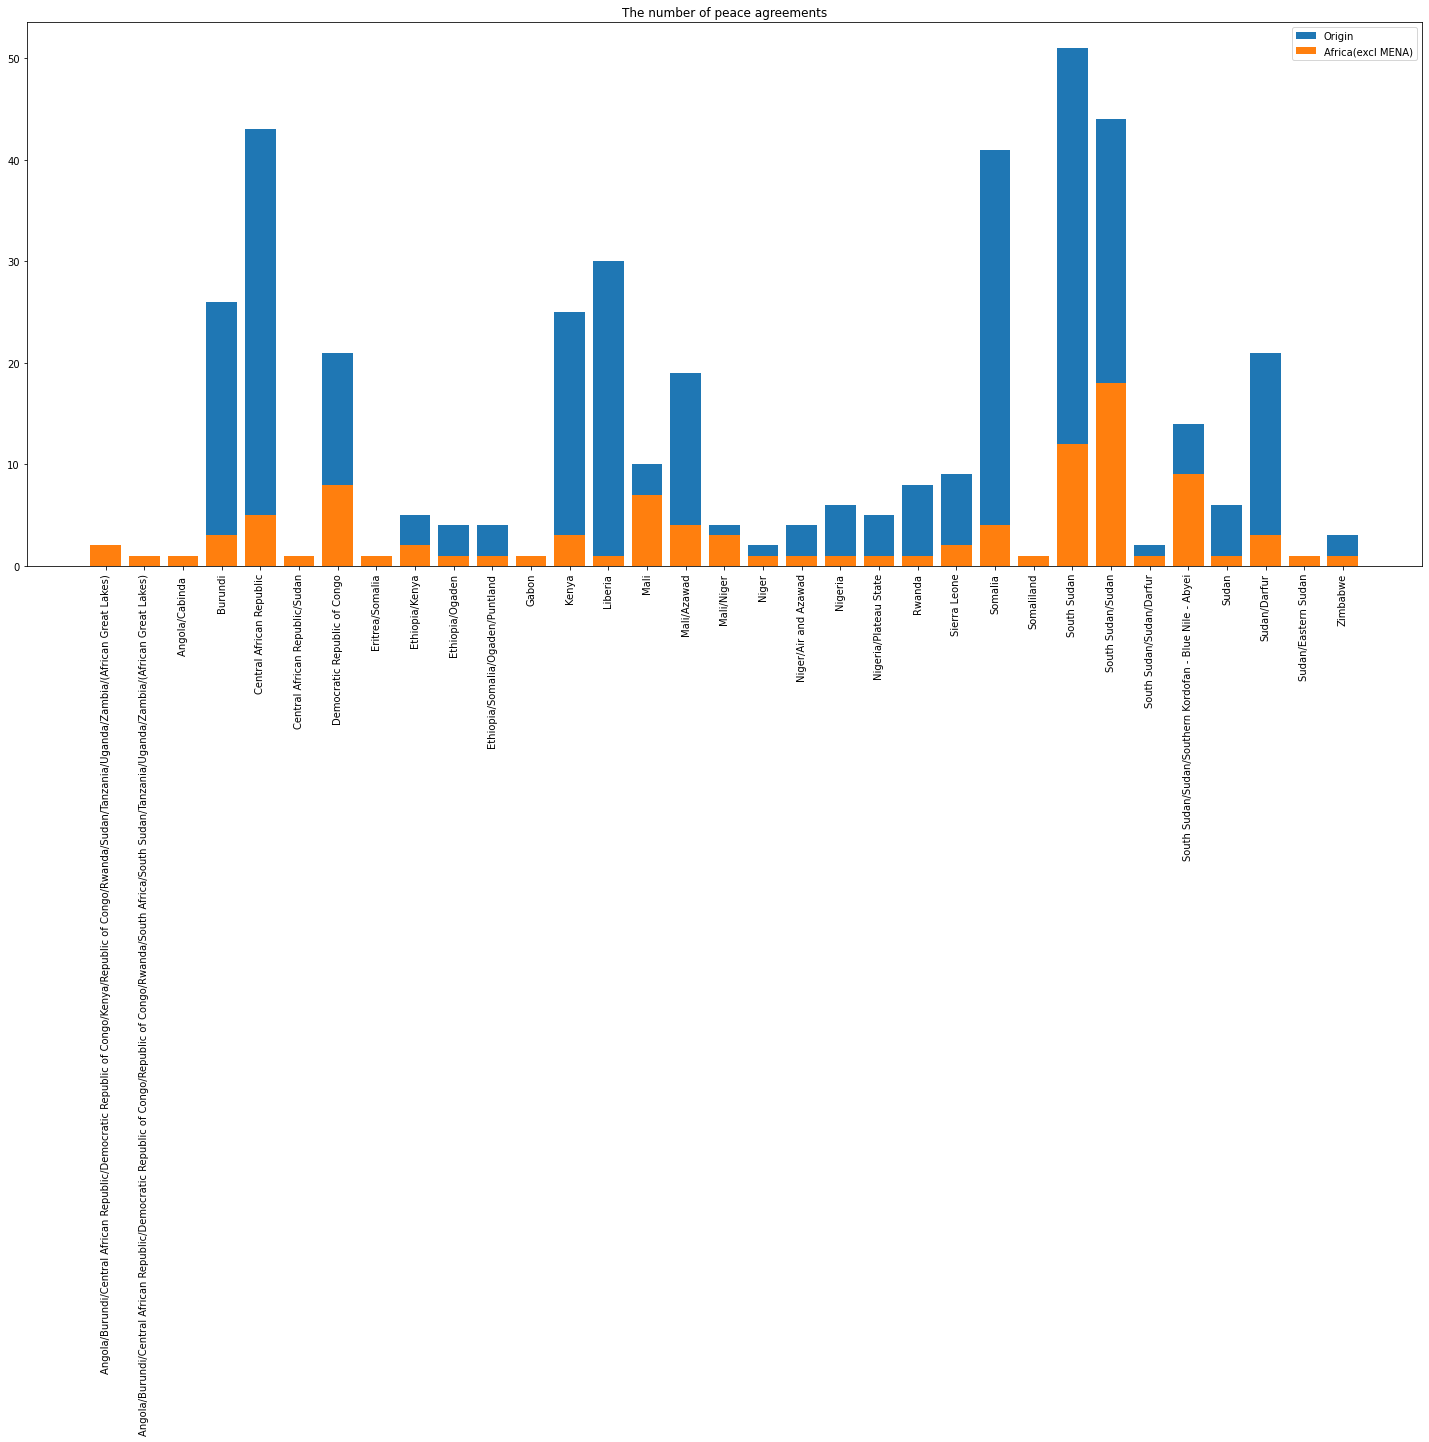

In [16]:
plt.figure(figsize=(25,10))

plt.bar(data_origin_Africa_country.index, data_origin_Africa_country.values,label='Origin')
plt.bar(data_Africa_country.index, data_Africa_country.values, label='Africa(excl MENA)')
plt.title("The number of peace agreements")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [18]:
data_Africa_country = data_Africa_country.sort_values(ascending=False)
data_Africa_country.head(10)

South Sudan/Sudan                                          18
South Sudan                                                12
South Sudan/Sudan/Southern Kordofan - Blue Nile - Abyei     9
Democratic Republic of Congo                                8
Mali                                                        7
Central African Republic                                    5
Mali/Azawad                                                 4
Somalia                                                     4
Burundi                                                     3
Kenya                                                       3
Name: Con, dtype: int64